In [108]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras_preprocessing import image
#import keras_preprocessing.image
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import BatchNormalization
#import cv2 as cv

In [109]:
import os
PATH = "B:\\somestuff\\simrise\\blalba\\new_tool\\images\\"
PATHPOOL = "B:\\somestuff\\simrise\\blalba\\new_tool\\images\\pool_rgb\\"
FILESPOOL = next(os.walk(PATHPOOL),(None,None,[]))[2]
os.chdir(PATH)
SIZE = 200

In [110]:
dataframe = pd.read_csv(f"{PATH}\\out_rgb.csv")
#dataframe = dataframe.applymap(str)
dataframe.head(5)

,Id,Bypass Diode,Junction Box,MHotspot,SHotspot
0,rgb1_IMGT0037.PNG,0,0,0,1
1,rgb1_IMGT0039.PNG,0,0,1,0
2,rgb1_IMGT0068.PNG,0,1,0,0
3,rgb1_IMGT0070.PNG,0,1,0,0
4,rgb1_IMGT0072.PNG,0,1,0,0


In [111]:
dataframe.shape


(1004, 5)

In [112]:
dataframe.head()

,Id,Bypass Diode,Junction Box,MHotspot,SHotspot
0,rgb1_IMGT0037.PNG,0,0,0,1
1,rgb1_IMGT0039.PNG,0,0,1,0
2,rgb1_IMGT0068.PNG,0,1,0,0
3,rgb1_IMGT0070.PNG,0,1,0,0
4,rgb1_IMGT0072.PNG,0,1,0,0


In [113]:
#X_npImageAll = np.array([cv.imread(f"{PATHPOOL}\\{img}") for img in FILESPOOL]);
#X_npImageAll = dataframe['Id']
#X_npImageAll
i = 0
X_npImageAll = list()
for f in dataframe.iloc[:,0]:
    img = load_img(f"{PATHPOOL}\\{f}\\",target_size=(SIZE,SIZE,3))
    img = img_to_array(img)
    img = img / 255.0 # normalize
    X_npImageAll.append(img)

X_npImageAll = np.array(X_npImageAll)
#X_npImageAll
    
    

In [114]:
X_npImageAll.shape

(1004, 200, 200, 3)

In [115]:
y_trainDataframe = dataframe.drop(['Id'], axis=1)

In [116]:
y_trainDataframe.head()

,Bypass Diode,Junction Box,MHotspot,SHotspot
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [117]:
y_trainDataframe.shape

(1004, 4)

In [118]:
X_train,X_test,y_train,y_test = train_test_split(X_npImageAll, y_trainDataframe, random_state=20,test_size=0.3)

In [119]:
model = Sequential()


In [120]:

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(SIZE,SIZE,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(2**7, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2**6, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(2**10, activation='relu'))
#model.add(Dropout(0.3))

#model.add(Dense(2**8, activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(2**2, activation='sigmoid'))





In [121]:
#model.summary()

In [122]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [128]:

history = model.fit(X_train, y_train, epochs=80, validation_data=(X_test, y_test), batch_size=10)



Epoch 1/80
71/71 [==============================] - 24s 335ms/step - loss: 0.4399 - accuracy: 0.6667 - val_loss: 0.6170 - val_accuracy: 0.5298
Epoch 2/80
71/71 [==============================] - 23s 324ms/step - loss: 0.5011 - accuracy: 0.6197 - val_loss: 0.3995 - val_accuracy: 0.6291
Epoch 3/80
71/71 [==============================] - 24s 332ms/step - loss: 0.4341 - accuracy: 0.6481 - val_loss: 0.4100 - val_accuracy: 0.6093
Epoch 4/80
71/71 [==============================] - 23s 323ms/step - loss: 0.4113 - accuracy: 0.6652 - val_loss: 0.3282 - val_accuracy: 0.7318
Epoch 5/80
71/71 [==============================] - 23s 320ms/step - loss: 0.3949 - accuracy: 0.6738 - val_loss: 0.3263 - val_accuracy: 0.7252
Epoch 6/80
71/71 [==============================] - 23s 317ms/step - loss: 0.3814 - accuracy: 0.7023 - val_loss: 0.3042 - val_accuracy: 0.6954
Epoch 7/80
71/71 [==============================] - 23s 318ms/step - loss: 0.3415 - accuracy: 0.7179 - val_loss: 0.3099 - val_accuracy: 0.7384

Epoch 58/80
71/71 [==============================] - 25s 348ms/step - loss: 0.1193 - accuracy: 0.8875 - val_loss: 0.1419 - val_accuracy: 0.8742
Epoch 59/80
71/71 [==============================] - 25s 355ms/step - loss: 0.1369 - accuracy: 0.8832 - val_loss: 0.1637 - val_accuracy: 0.8245
Epoch 60/80
71/71 [==============================] - 26s 362ms/step - loss: 0.0935 - accuracy: 0.9003 - val_loss: 0.1451 - val_accuracy: 0.8742
Epoch 61/80
71/71 [==============================] - 28s 399ms/step - loss: 0.0988 - accuracy: 0.9017 - val_loss: 0.1868 - val_accuracy: 0.8245
Epoch 62/80
71/71 [==============================] - 25s 356ms/step - loss: 0.0888 - accuracy: 0.9174 - val_loss: 0.1422 - val_accuracy: 0.8675
Epoch 63/80
71/71 [==============================] - 27s 387ms/step - loss: 0.1125 - accuracy: 0.8989 - val_loss: 0.1467 - val_accuracy: 0.8709
Epoch 64/80
71/71 [==============================] - 30s 426ms/step - loss: 0.0956 - accuracy: 0.8946 - val_loss: 0.1642 - val_accuracy:

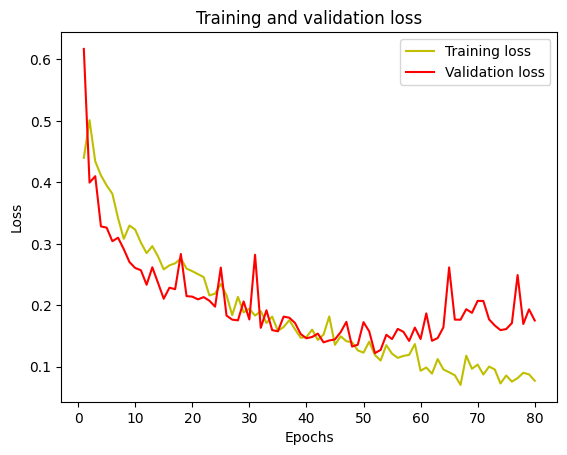

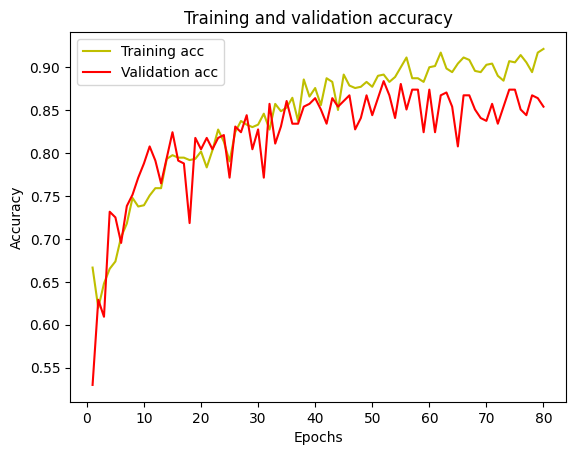

In [129]:

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#print("")

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])